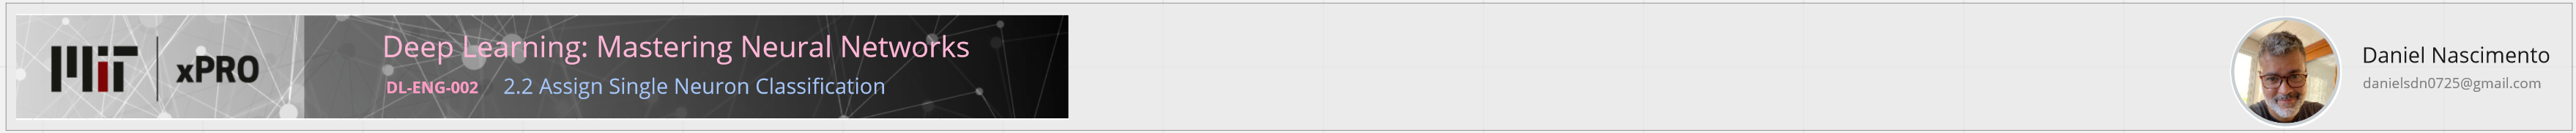

## 2.2 Assign Single Neuron *Classification*




Instructions: Now  that we have developed and trained a Single Neuron Classifier on our  toy example dataset, it is time to tackle a larger real-world dataset.  For this assignment, you will be given couple of datasets of over 6,000  bottles of white and red wine, and you will train the class  implementation of the Single Neuron Classifier to perform binary  classification on the wine color based on their different  characteristics. 

===================================================================================================================

In [ ]:
#Sometimes we have to update scikit-learn modules to be able to use some specific graph plotting features
!pip install --upgrade scikit-learn

## 1 - Dataset preprossessing

In [1]:
# Code source: Daniel Silva do Nascimento
# 
# Credits:
#    classes:   SingleNeuronModel
#               SingleNeuronClassificationModel
#               gradient
#               train_model_NLL_loss
#               evaluate_classification_accuracy
#   to: Module 2: Class Implementation of Single Neuron Model
#


# Here we make the importation of the 2 datasets and we make some extra-work in worders to transform it to the dataset we need to work ou
import pandas as pd
import numpy as np


# Download the wine .csv files from data archive
!rm -f winequality-red.csv winequality-white.csv
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

# Dataframe + Color column
df_red = pd.read_csv('winequality-red.csv',delimiter=";")
df_white = pd.read_csv('winequality-white.csv',delimiter=";")

#Adding the binary color column to both datasets  df_red = 1 / df_white = 0
df_red["color"] = 1 
df_white["color"] = 0 

# Now we combine our two dataframes
sample_wine = pd.concat([df_red, df_white])

# And shuffle them in place to mix the red and white wine data together
sample_wine = sample_wine.sample(frac=1).reset_index(drop=True)


# We choose three attributes of the wine to perform our prediction on
input_columns = ["citric acid", "residual sugar", "total sulfur dioxide"]
output_columns = ["color"]


# We extract the relevant features into our X and Y numpy arrays
X = sample_wine[input_columns].to_numpy(dtype='float64')
y = sample_wine[output_columns].to_numpy()

# I defined a variable val_color_y = y in order have the original binarie color
val_color_y = y
y = y.flatten()




--2023-01-17 21:58:33--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84199 (82K) [application/x-httpd-php]
Saving to: ‘winequality-red.csv’

winequality-red.csv 100%[===================>]  82.23K  --.-KB/s    in 0.1s    

2023-01-17 21:58:33 (828 KB/s) - ‘winequality-red.csv’ saved [84199/84199]

--2023-01-17 21:58:33--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 264426 (258K) [application/x-httpd-php]
Saving to: ‘winequality-white.csv’

winequality-white.c 100%[======

### X dataset analilysis 


In [2]:
# we create this simple dataframe - df_X just to make an analises of X
df_X = pd.DataFrame(np.array(X),columns=["citric acid", "residual sugar", "total sulfur dioxide"])
df_X.info()
df_X.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   citric acid           6497 non-null   float64
 1   residual sugar        6497 non-null   float64
 2   total sulfur dioxide  6497 non-null   float64
dtypes: float64(3)
memory usage: 152.4 KB


,citric acid,residual sugar,total sulfur dioxide
count,6497.000000,6497.000000,6497.000000
mean,0.318633,5.443235,115.744574
std,0.145318,4.757804,56.521855
min,0.000000,0.600000,6.000000
25%,0.250000,1.800000,77.000000
50%,0.310000,3.000000,118.000000
75%,0.390000,8.100000,156.000000
max,1.660000,65.800000,440.000000


Here we see, that the column: residual sugar (highlighted in orange) has very different values ​​if compared with column: citric acid. This gets even worse when we look at the column: total sulfur dioxide - (highlighted in red ) - with max = 440, that is: 265 x greater than the max of the 'citric acid' column. When testing the model with this dataset, the results were negative. We endeed up doing some pre-processing - normalization

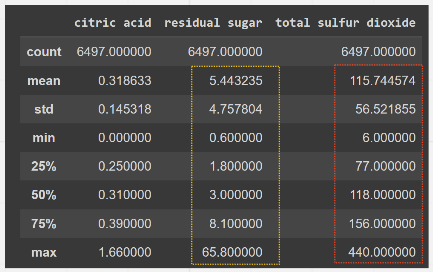

In [3]:
# We use the scaler: sklearn.preprocessing - StandardScaler to normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)
X_scaler = scaler.transform(X)

df_X_scaler = pd.DataFrame(np.array(X_scaler),columns=["citric acid", "residual sugar", "total sulfur dioxide"])
df_X_scaler.describe()

,citric acid,residual sugar,total sulfur dioxide
count,6.497000e+03,6.497000e+03,6.497000e+03
mean,2.843483e-17,4.265225e-17,-3.116895e-17
std,1.000077e+00,1.000077e+00,1.000077e+00
min,-2.192833e+00,-1.018034e+00,-1.941780e+00
25%,-4.723335e-01,-7.657978e-01,-6.855323e-01
50%,-5.941375e-02,-5.135612e-01,3.990667e-02
75%,4.911459e-01,5.584445e-01,7.122647e-01
max,9.231281e+00,1.268682e+01,5.737257e+00


We can now see that the values ​​are more "equanimous", which will help in our classification and analysis.

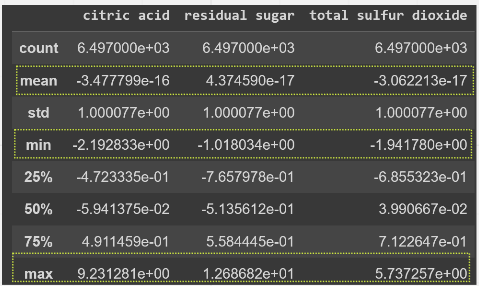

# Creating an abstract SingleNeuronModel classifier

I kept the same classes from module 2 presentation making some small adjustments. I thought it would be more productive to focus on understanding the class relationship mechanism and the algorithms established in them

In [4]:
# We ended up using the classes created as an example from module 2 to use in our model. 
# We adjust some hyperparameters to adapt to our dataset

class SingleNeuronModel():
    def __init__(self, in_features):
        #self.w = np.zeros(in_features)
        #self.w_0 = 0. 
        # Better, we set initial weights to small normally distributed values.
        self.w = 0.01 * np.random.randn(in_features)
        self.w_0 = 0.01 * np.random.randn()
        self.non_zero_tolerance = 1e-8 # add this to divisions to ensure we don't divide by 0

        
    def forward(self, x):
        # Calculate and save the pre-activation z
        self.z = x @ self.w.T + self.w_0
    
        # Apply the activation function, and return
        self.a = self.activation(self.z)
        A = self.a
        #print("A: ", A)
        return self.a

    # update weights based on gradients and learning rate
    def update(self, grad_loss, learning_rate):
        model.w   -= grad_loss * self.grad_w   * learning_rate
        model.w_0 -= grad_loss * self.grad_w_0 * learning_rate



# New implementation! Single neuron classification model
class SingleNeuronClassificationModel(SingleNeuronModel):
    # Sigmoid activation function for classification
    def activation(self, z):
        #print("z: ", z)
        #print()
        #A = 1 / (1 + np.exp(-z) + self.non_zero_tolerance)
        #print("A: ", A)
        return 1 / (1 + np.exp(-z) + self.non_zero_tolerance)

    # Gradient of output w.r.t. weights, for sigmoid activation
    def gradient(self, x):
        self.grad_w = self.a * (1-self.a) * x
        self.grad_w_0 = self.a * (1-self.a)



# Training process, using negative log likelihood (NLL) loss -- 
# appropriate for classification problems.

def train_model_NLL_loss(model, input_data, output_data, 
                         learning_rate, num_epochs):
    non_zero_tolerance = 1e-8 # add this to the log calculations to ensure we don't take the log of 0
    num_samples = len(input_data)
    for epoch in range(1, num_epochs+1):
        total_loss = 0 #keep track of total loss across the data set
            
        for i in range(num_samples):
            x = input_data[i,...]
            y = output_data[i]
            y_predicted = model.forward(x)

            # NLL loss function
            loss = -(y * np.log(y_predicted + non_zero_tolerance) + (1-y) * np.log(1-y_predicted + non_zero_tolerance))
            total_loss += loss

            # gradient of prediction w.r.t. weights
            model.gradient(x)

            #gradient of loss w.r.t. prediction, for NLL
            grad_loss = (y_predicted - y)/(y_predicted * (1-y_predicted))
            
            # update our model based on gradients
            model.update(grad_loss, learning_rate)
            
        report_every = max(1, num_epochs // 10)
        if epoch == 1 or epoch % report_every == 0: #every few epochs, report
            print("epoch", epoch, "has total loss", total_loss)



# We will use this function to evaluate how well our trained classifier perfoms
def evaluate_classification_accuracy(model, input_data, labels):
    # Count the number of correctly classified samples given a set of weights
    correct = 0
    incorrect = 0
    num_samples = len(input_data)
    #processed = pd.DataFrame(columns=['x value','y value'])
    for i in range(num_samples):
        x = input_data[i,...]
        y = labels[i]
        y_predicted = model.forward(x)
        label_predicted = 1 if y_predicted > 0.5 else 0
        if label_predicted == y:
            correct += 1
        else:
            incorrect  += 1
            #id: To make it easier to analyze misclassify, I added the i index and label_predicted column 
            print("Misclassify id: ", i, " x: ", x, " y: ", y, "label_predicted: ", label_predicted,  "activation value: ", y_predicted)      
    
    accuracy = correct / num_samples
    
    print()
    print("Our model predicted", correct, "out of", num_samples)
    print()
    print("correctly for", accuracy*100, "% accuracy   | incorrect: ", incorrect)
    print()
    return accuracy         



In [5]:
# In this example we set the learning rate relatively small. 
# However, we only train for a few epochs which is not 
# enough to converge on an accurate classifier.

input_data = X_scaler
labels = y
learning_rate = 0.001
epochs = 100

model = SingleNeuronClassificationModel(in_features=len(input_data[0]))

train_model_NLL_loss(model, input_data, labels, learning_rate, epochs)

print("\nFinal weights:")
print(model.w, model.w_0)

evaluate_classification_accuracy(model, input_data, labels)


#Valores finais
print("\nFinal weights:")
print(model.w, model.w_0)
print()
print()
w = model.w

w_0 = model.w_0

epoch 1 has total loss 2898.8840665399593
epoch 10 has total loss 1441.210096461792
epoch 20 has total loss 1402.39515691532
epoch 30 has total loss 1396.7330816957094
epoch 40 has total loss 1395.5920897115873
epoch 50 has total loss 1395.3339436424224
epoch 60 has total loss 1395.273020636366
epoch 70 has total loss 1395.258678266711
epoch 80 has total loss 1395.2554877879709
epoch 90 has total loss 1395.2549015051038
epoch 100 has total loss 1395.2548690687572

Final weights:
[-0.27445319 -0.56286684 -3.39128931] -3.044091044759549
Misclassify id:  6  x:  [ 1.66108525 -0.72375839  0.32300481]  y:  1 label_predicted:  0 activation value:  0.01494965774664309
Misclassify id:  7  x:  [-0.54115347 -0.59764007 -0.40243416]  y:  1 label_predicted:  0 activation value:  0.232471619294546
Misclassify id:  8  x:  [ 0.62878585  0.51640502 -0.11933603]  y:  1 label_predicted:  0 activation value:  0.042998999075423996
Misclassify id:  41  x:  [ 2.83102457  0.23263882 -0.70322593]  y:  1 label_

## Scatter3d
I found this plotly library very interesting, it allows you make a Scaterplot in interactive 3D. I also managed to create a thin hyperplane - to classify white wine (green dots) and red wine (red dots).

In [13]:
import plotly.graph_objs as go 
from plotly.subplots import make_subplots

index = 0
factor = 1
w = model.w  # w = model.coef_[0]

# Here whe create a meshgrid using the min and max of X values. Also, we create the hyperplane from the line equation 
xx, yy = np.meshgrid(*np.array([X.min(axis=0), X.max(axis=0)])[:,:2].T)
zz = -(w[0]/w[2])*xx -(w[1]/w[2])*yy - model.w_0/w[2]

#mapping the x, y, z from 
x=factor*X_scaler[:,0]
y=factor*X_scaler[:,1]
z=factor*X_scaler[:,2]


idx = []
colors = []
wine_type = []
for label in val_color_y:
  index += 1
  idx.append(index)
  if label == 0:
        colors.append("green")
        wine_type.append('white')
  else:
        colors.append("red")
        wine_type.append('red')

fig = go.Figure([go.Scatter3d(x=x, y=y, z=z, 
                          mode="markers",
                          marker=dict(
                              size=3,
                              color=colors,
                              colorscale=[[0, 'gray']],         
                              opacity=0.7)
                              ),

go.Surface(x=xx, y=yy, z=zz, #x=xx, y=yy, z=zz
            opacity=.7, 
            showscale=False,
            surfacecolor=np.zeros(zz.shape), 
            colorscale=[[0, 'gray']])])



# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))



In [12]:
#creation of a df_data
df_data = pd.DataFrame({'idx': idx})
df_data = pd.DataFrame({'citric acid': X[:,0], 'residual sugar': X[:,1], 'total sulfur dioxide': X[:,2]})
df_data['citric acid'] = x
df_data['residual sugar'] = y
df_data['total sulfur dioxide'] = z
df_data["bin_color"] = val_color_y
df_data["wine_type"] = wine_type
df_data["colors"] = colors

print(df_data.head(20))

    citric acid  residual sugar  total sulfur dioxide  bin_color wine_type  \
0      0.009406       -0.828857              0.287618          0     white   
1      2.211645       -0.681719             -1.304809          1       red   
2     -0.816433       -0.723758             -1.357890          1       red   
3      0.009406       -0.765798             -1.906393          1       red   
4     -1.091713        0.180090              1.331542          0     white   
5      0.559966       -0.723758             -0.420128          0     white   
6      1.661085       -0.723758              0.323005          1       red   
7     -0.541153       -0.597640             -0.402434          1       red   
8      0.628786        0.516405             -0.119336          1       red   
9     -0.128234       -0.450502             -0.243191          0     white   
10     0.697606       -0.030108              0.128375          0     white   
11    -0.541153        1.399233              1.667721          0